In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\Nifty50_201910'
N50_path = os.path.join(dir_data, 'FN_1M_20140101-20191011.txt')
N50 = pd.read_csv(N50_path, engine='python')
N50.dropna(how='any',inplace=True)
N50.Date = pd.to_datetime(N50.Date)
# Create Year & month 
N50['Year'] = N50['Date'].map(lambda x: x.year)
N50['Month'] = N50['Date'].map(lambda x: x.month)
# Sort N50 by Date
N50 = N50.sort_values(by = ['Date', 'Time'])
Year_sorted = np.sort(N50.Year.unique())
N50.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month
0,2014-01-01,00:06,6364.0,6364.5,6364.0,6364.5,6,2014,1
1,2014-01-01,00:27,6364.5,6364.5,6364.5,6364.5,2,2014,1
2,2014-01-01,00:46,6364.5,6364.5,6364.5,6364.5,19,2014,1
3,2014-01-01,00:56,6364.5,6364.5,6364.5,6364.5,1,2014,1
4,2014-01-01,01:17,6366.0,6370.0,6366.0,6370.0,53,2014,1


### EDA

In [61]:
N50['Return'] = (N50['High'] - N50['Low']) / N50['Close']
N50.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,pvi,pvi_ema,nvi,nvi_ema,Return
0,2014-01-01,00:06,6364.0,6364.5,6364.0,6364.5,6,2014,1,1000.0,1000.000000,1000.0,1000.000000,0.000079
1,2014-01-01,00:27,6364.5,6364.5,6364.5,6364.5,2,2014,1,1000.0,1000.000000,6364.5,3687.499022,0.000000
2,2014-01-01,00:46,6364.5,6364.5,6364.5,6364.5,19,2014,1,6364.5,2795.169918,6364.5,4583.327454,0.000000
3,2014-01-01,00:56,6364.5,6364.5,6364.5,6364.5,1,2014,1,6364.5,3692.748003,6364.5,5031.238240,0.000000
4,2014-01-01,01:17,6366.0,6370.0,6366.0,6370.0,53,2014,1,6370.0,4232.397981,6364.5,5299.981967,0.000628


Text(0.5, 1, 'N50 Correlation Heatmap')

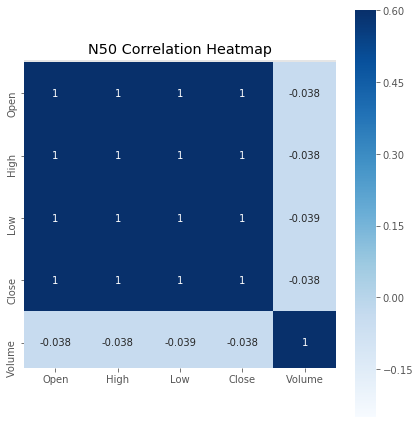

In [50]:
# Correlation heatmap
# bug fix : https://github.com/matplotlib/matplotlib/issues/14751
plt.figure(figsize = (6, 6))
N50_corrs = N50.iloc[:,1:].corr()
ax = sns.heatmap(N50_corrs, cmap = 'Blues', vmin = -0.25, annot = True, vmax = 0.6, square=True)
ax.set_ylim(len(N50_corrs)-0.1, -0.04)
plt.tight_layout()
plt.title('N50 Correlation Heatmap')

In [74]:
Year_sorted

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

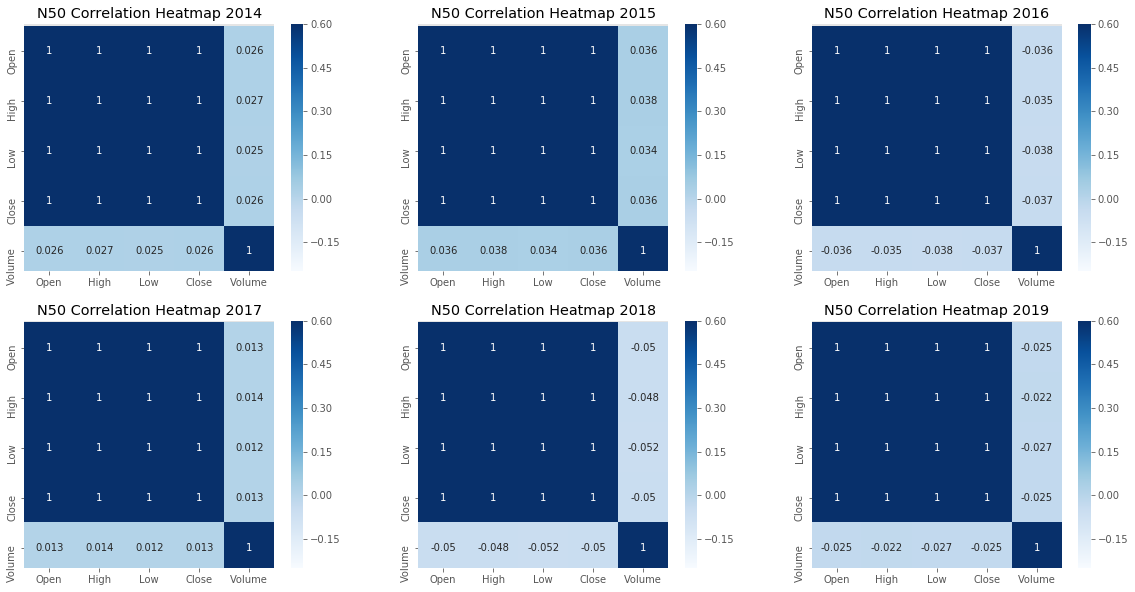

In [86]:
# Correlation heatmap for each year
plt.figure(figsize=(20,10))
nrows = 2
ncols = 3
v_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(len(Year_sorted)):
    plt.subplot(nrows, ncols, i+1)
    Corrs = N50.loc[N50['Year'] == Year_sorted[i],v_columns].corr()
    ax = sns.heatmap(Corrs, cmap = 'Blues', vmin = -0.25, annot = True, vmax = 0.6, square=True)
    ax.set_ylim(len(N50_corrs)-0.1, -0.04)
    plt.title('N50 Correlation Heatmap %d' % Year_sorted[i])

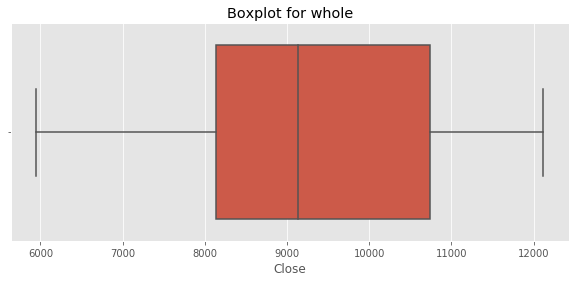

In [88]:
# Box plot for whole
plt.figure(figsize=(10,4))
sns.boxplot(N50.loc[:, 'Close'])
plt.title('Boxplot for whole')
plt.show()

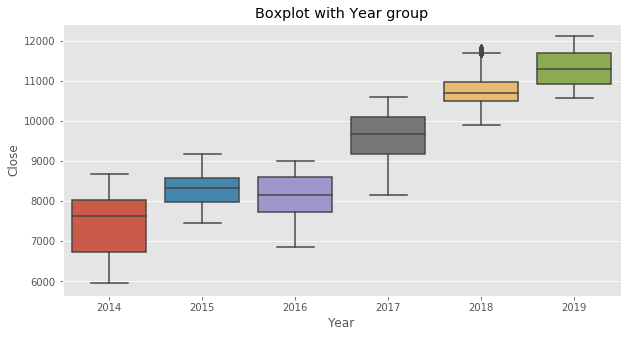

In [94]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='Close', data=N50)
plt.title('Boxplot with Year group')
plt.show()

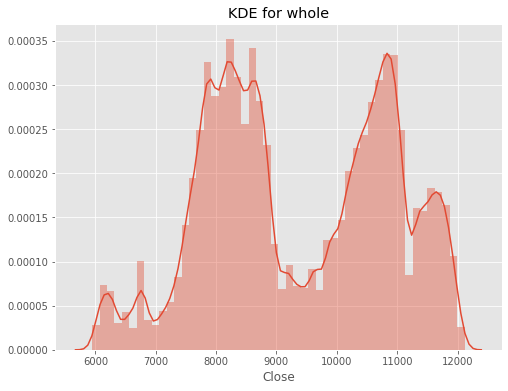

In [70]:
# KDE for whole
plt.figure(figsize=(8,6))
sns.distplot(N50.loc[:, 'Close'])
plt.title('KDE for whole')
plt.show()

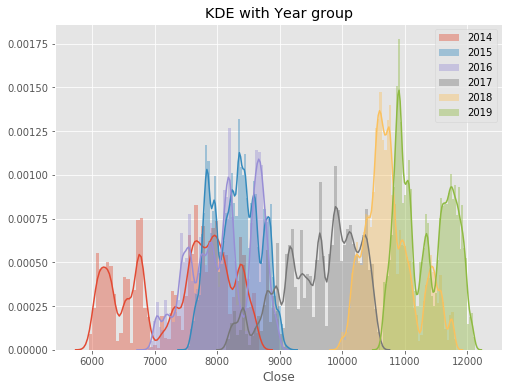

In [69]:
# Draw 6 KDE curves group by year
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.distplot(N50.loc[(N50['Year'] == Year_sorted[i]), 'Close'], label = str(Year_sorted[i]))
plt.title('KDE with Year group')
plt.legend()
plt.show()

### Wave analysis

### Hour k

In [63]:
# Split time
time = N50['Time'].str.split(':', 2, expand = True)
N50['Hour'] = time[0]
N50.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,pvi,pvi_ema,nvi,nvi_ema,Return,Hour
0,2014-01-01,00:06,6364.0,6364.5,6364.0,6364.5,6,2014,1,1000.0,1000.000000,1000.0,1000.000000,0.000079,00
1,2014-01-01,00:27,6364.5,6364.5,6364.5,6364.5,2,2014,1,1000.0,1000.000000,6364.5,3687.499022,0.000000,00
2,2014-01-01,00:46,6364.5,6364.5,6364.5,6364.5,19,2014,1,6364.5,2795.169918,6364.5,4583.327454,0.000000,00
3,2014-01-01,00:56,6364.5,6364.5,6364.5,6364.5,1,2014,1,6364.5,3692.748003,6364.5,5031.238240,0.000000,00
4,2014-01-01,01:17,6366.0,6370.0,6366.0,6370.0,53,2014,1,6370.0,4232.397981,6364.5,5299.981967,0.000628,01


In [65]:
# from min k to hour k
import os
import pandas as pd
import datetime

stock = N50.set_index('Date')
period_stock_data = pd.DataFrame()
period_stock_data['open_hour'] = stock.groupby([stock.index,'Hour'])['Open'].first()
period_stock_data['close_hour'] = stock.groupby([stock.index,'Hour'])['Close'].first()
period_stock_data['high_hour'] = stock.groupby([stock.index,'Hour'])['High'].max()
period_stock_data['low_hour'] = stock.groupby([stock.index,'Hour'])['Low'].min()
period_stock_data['volume_hour'] = stock.groupby([stock.index,'Hour'])['Volume'].sum()
period_stock_data['return_hour'] = ((period_stock_data['high_hour'] - period_stock_data['low_hour']) / period_stock_data['close_hour']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data['Year'] = period_stock_data['Date'].map(lambda x: x.year)
period_stock_data.head()

,Date,Hour,open_hour,close_hour,high_hour,low_hour,volume_hour,return_hour,Year
0,2014-01-01,00,6364.0,6364.5,6364.5,6364.0,28,0.007856,2014
1,2014-01-01,01,6366.0,6370.0,6370.0,6360.0,58,0.156986,2014
2,2014-01-01,09,6360.0,6360.0,6360.0,6360.0,1,0.000000,2014
3,2014-01-01,11,6370.0,6370.0,6370.0,6349.0,28,0.329670,2014
4,2014-01-01,12,6356.5,6358.0,6358.5,6352.0,172,0.102233,2014


In [105]:
# Growth rate_hour_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_hour})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change['Hour'] = pd.DataFrame(period_stock_data.iloc[:, [0,1]]).set_index('Date')
stock_change['Year'] = pd.DataFrame(period_stock_data.iloc[:, [0,-1]]).set_index('Date')
stock_change['Hour'] = stock_change['Hour'].astype(int)
stock_change = stock_change.sort_values(by=['Year','Hour'])
stock_change.head()

,Close,Hour,Year
Date,,,
2014-01-01,NaN,0,2014
2014-01-03,-0.003610,0,2014
2014-01-04,-0.000401,0,2014
2014-01-07,0.000000,0,2014
2014-01-08,-0.000161,0,2014


Text(0.5, 1.0, 'N50 scatter plots')

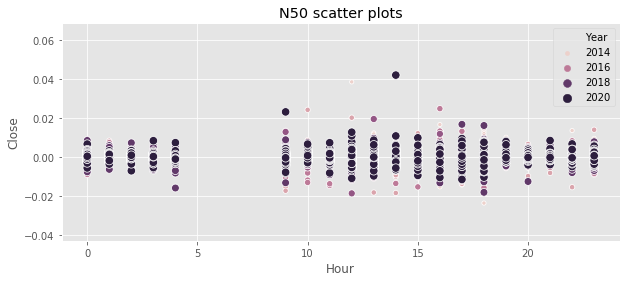

In [109]:
# Stock distribution_day_chage
fig, ax = plt.subplots(figsize = (10,4))
sns.scatterplot(x=stock_change.Hour, y=stock_change.Close,size=stock_change.Year,hue = stock_change.Year)
plt.title('N50 scatter plots')

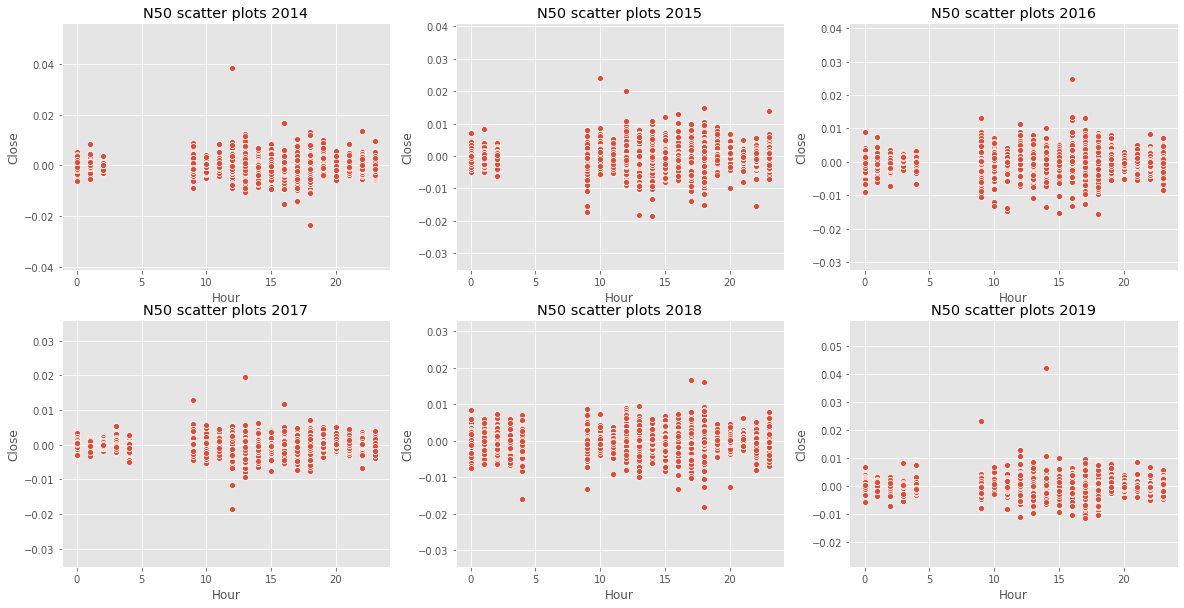

In [107]:
# Draw 6 scatter plots group by year
plt.figure(figsize=(20,10))
nrows = 2
ncols = 3
v_columns = ['Hour','Close']
for i in range(len(Year_sorted)):
    plt.subplot(nrows, ncols, i+1)
    Wave = stock_change.loc[stock_change['Year'] == Year_sorted[i],v_columns]
    sns.scatterplot(x=Wave.Hour, y=Wave.Close)
    plt.title('N50 scatter plots %d' % Year_sorted[i])

Text(0.5, 1, 'N50 Correlation Heatmap')

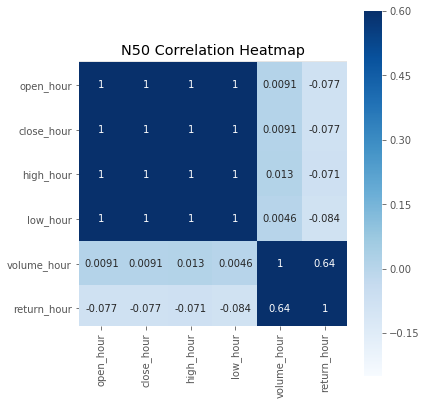

In [67]:
# Correlation heatmap
# bug fix : https://github.com/matplotlib/matplotlib/issues/14751
plt.figure(figsize = (6, 6))
N50_corrs = period_stock_data.iloc[:,2:8].corr()
ax = sns.heatmap(N50_corrs, cmap = 'Blues', vmin = -0.25, annot = True, vmax = 0.6, square=True)
ax.set_ylim(len(N50_corrs)-0.1, -0.04)
plt.tight_layout()
plt.title('N50 Correlation Heatmap')

Text(0.5, 1.0, 'N50_return scatter plots')

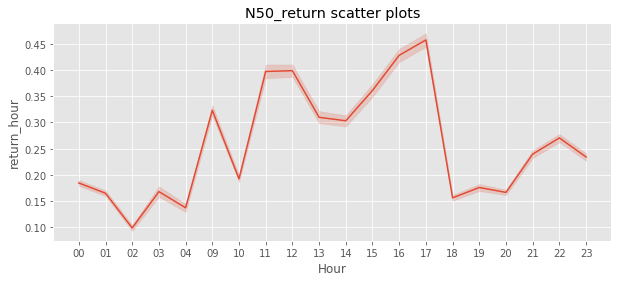

In [78]:
# Stock distribution_day_chage
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(period_stock_data.Hour, period_stock_data.return_hour)
plt.title('N50_return scatter plots')

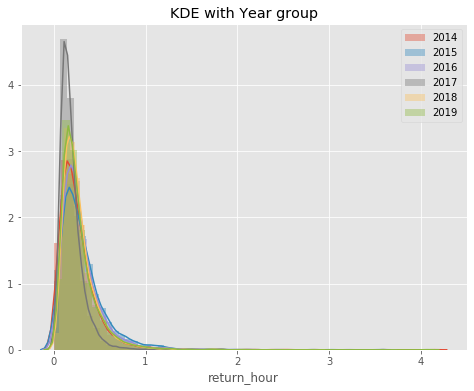

In [77]:
# Draw 6 KDE curves group by year
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.distplot(period_stock_data.loc[(period_stock_data['Year'] == Year_sorted[i]), 'return_hour'], label = str(Year_sorted[i]))
plt.title('KDE with Year group')
plt.legend()
plt.show()

### Day k

In [110]:
# from min k to day k
stock = N50.set_index('Date')
period_type = 'D'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_day'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_day'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_day'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_day'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_day'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Hour,open_day,close_day,high_day,low_day,volume_day
0,2014-01-01,18:00,6359.5,6359.5,6359.5,6359.5,4.0,2014.0,1.0,18,6364.0,6359.5,6370.0,6349.0,589
1,2014-01-02,23:59,6220.5,6224.0,6220.0,6224.0,39.0,2014.0,1.0,23,6355.5,6224.0,6411.0,6215.0,47708
2,2014-01-03,23:59,6231.5,6231.5,6231.5,6231.5,21.0,2014.0,1.0,23,6223.0,6231.5,6258.0,6184.5,44468
3,2014-01-04,02:00,6221.5,6221.5,6221.0,6221.0,20.0,2014.0,1.0,02,6232.5,6221.0,6241.5,6218.0,1145
4,2014-01-06,23:58,6210.0,6210.0,6210.0,6210.0,1.0,2014.0,1.0,23,6232.5,6210.0,6246.5,6196.5,25106


In [114]:
# Over Yesterday
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 1806:
        c.append(period_stock_data.loc[i+1, 'open_day'] > period_stock_data.loc[i, 'close_day'])
        d.append(period_stock_data.loc[i+1, 'open_day'] < period_stock_data.loc[i, 'close_day'])
    else:
        break
print("Over yesterday high:%.2f"% ((sum(c)/2441)*100) + "%")
print("Over yesterday low:%.2f"% ((sum(d)/2441)*100) + "%")

Over yesterday high:30.73%
Over yesterday low:28.10%


In [116]:
# Growth rate_day_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_day})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2014-01-01,NaN
2014-01-02,-0.021537
2014-01-03,0.001204
2014-01-04,-0.001686
2014-01-06,-0.001770


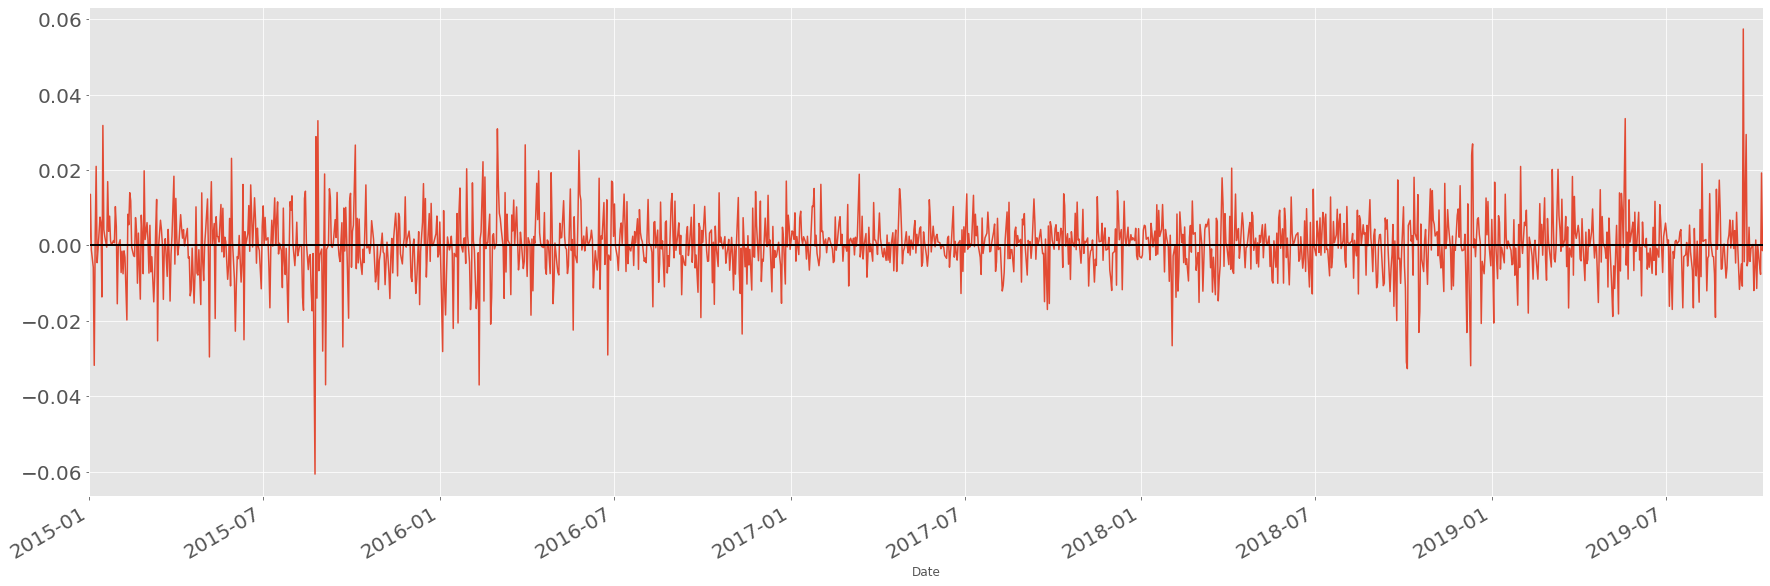

In [117]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

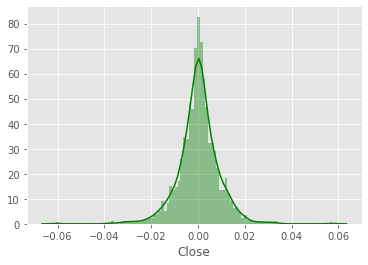

In [118]:
# Stock distribution_day_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

### Min k

In [119]:
# from min k to week k
import os
import pandas as pd

stock = N50.set_index('Date')
period_type = 'W'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_week'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_week'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_week'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_week'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_week'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Hour,open_week,close_week,high_week,low_week,volume_week
0,2014-01-05,02:00,6221.5,6221.5,6221.0,6221.0,20,2014,1,02,6364.0,6221.0,6411.0,6184.5,93910
1,2014-01-12,02:00,6209.5,6211.5,6209.5,6211.5,2,2014,1,02,6232.5,6211.5,6262.0,6138.0,136762
2,2014-01-19,02:00,6257.5,6257.5,6256.0,6256.0,32,2014,1,02,6213.5,6256.0,6355.0,6201.5,143621
3,2014-01-26,02:00,6190.0,6190.0,6185.0,6185.5,54,2014,1,02,6245.0,6185.5,6372.0,6171.0,161013
4,2014-02-02,01:59,6082.0,6082.0,6082.0,6082.0,10,2014,2,01,6170.0,6082.0,6207.5,6032.0,315036


In [121]:
# Over last week
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 301:
        c.append(period_stock_data.loc[i+1, 'open_week'] > period_stock_data.loc[i, 'close_week'])
        d.append(period_stock_data.loc[i+1, 'open_week'] < period_stock_data.loc[i, 'close_week'])
    else:
        break
print("Over last week high:%.2f"% ((sum(c)/426)*100) + "%")
print("Over last week low:%.2f"% ((sum(d)/426)*100) + "%")

Over last week high:33.10%
Over last week low:35.92%


In [122]:
# Growth rate_week_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_week})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2014-01-05,NaN
2014-01-12,-0.001528
2014-01-19,0.007139
2014-01-26,-0.011333
2014-02-02,-0.016874


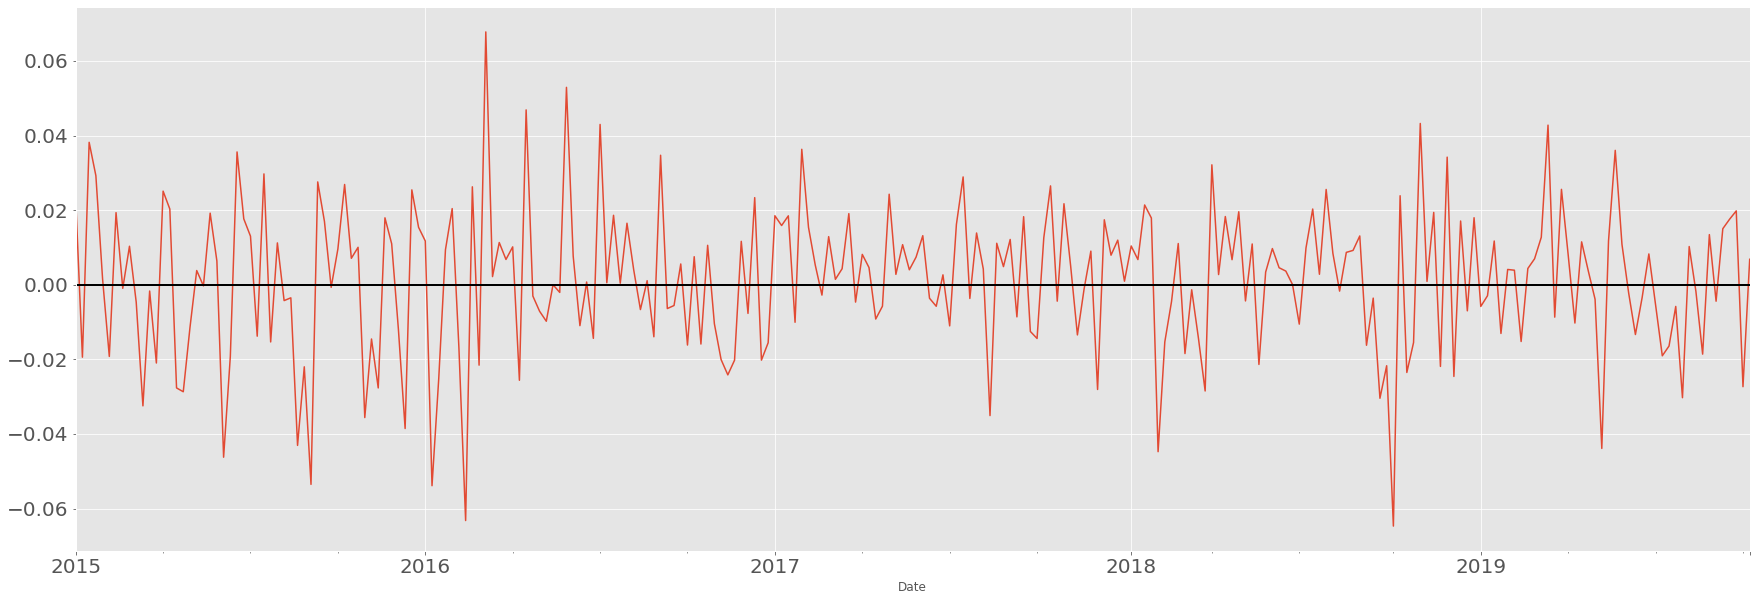

In [123]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

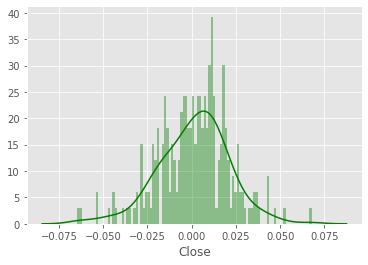

In [124]:
# Stock distribution_week_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

### Month k

In [125]:
# from min k to month k
import os
import pandas as pd

stock = N50.set_index('Date')
period_type = 'M'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_month'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_month'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_month'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_month'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_month'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Hour,open_month,close_month,high_month,low_month,volume_month
0,2014-01-31,23:56,6073.5,6075.0,6073.5,6075.0,15,2014,1,23,6364.0,6075.0,6411.0,6032.0,849885
1,2014-02-28,23:58,6311.0,6311.0,6309.5,6311.0,21,2014,2,23,6070.0,6311.0,6322.0,5946.5,686290
2,2014-03-31,23:58,6767.0,6767.0,6767.0,6767.0,16,2014,3,23,6308.0,6767.0,6788.5,6191.0,898421
3,2014-04-30,23:58,6724.0,6724.0,6724.0,6724.0,3,2014,4,23,6769.0,6724.0,6933.5,6681.5,832883
4,2014-05-31,02:00,7224.0,7224.0,7224.0,7224.0,27,2014,5,02,6724.0,7224.0,7620.0,6654.0,1135701


In [127]:
# Over last month
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 69:
        c.append(period_stock_data.loc[i+1, 'open_month'] > period_stock_data.loc[i, 'close_month'])
        d.append(period_stock_data.loc[i+1, 'open_month'] < period_stock_data.loc[i, 'close_month'])
    else:
        break
print("Over last month high:%.2f"% ((sum(c)/99)*100) + "%")
print("Over last month low:%.2f"% ((sum(d)/99)*100) + "%")

Over last month high:33.33%
Over last month low:24.24%


In [128]:
# Growth rate_week_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_month})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2014-01-31,NaN
2014-02-28,0.038112
2014-03-31,0.069764
2014-04-30,-0.006375
2014-05-31,0.071726


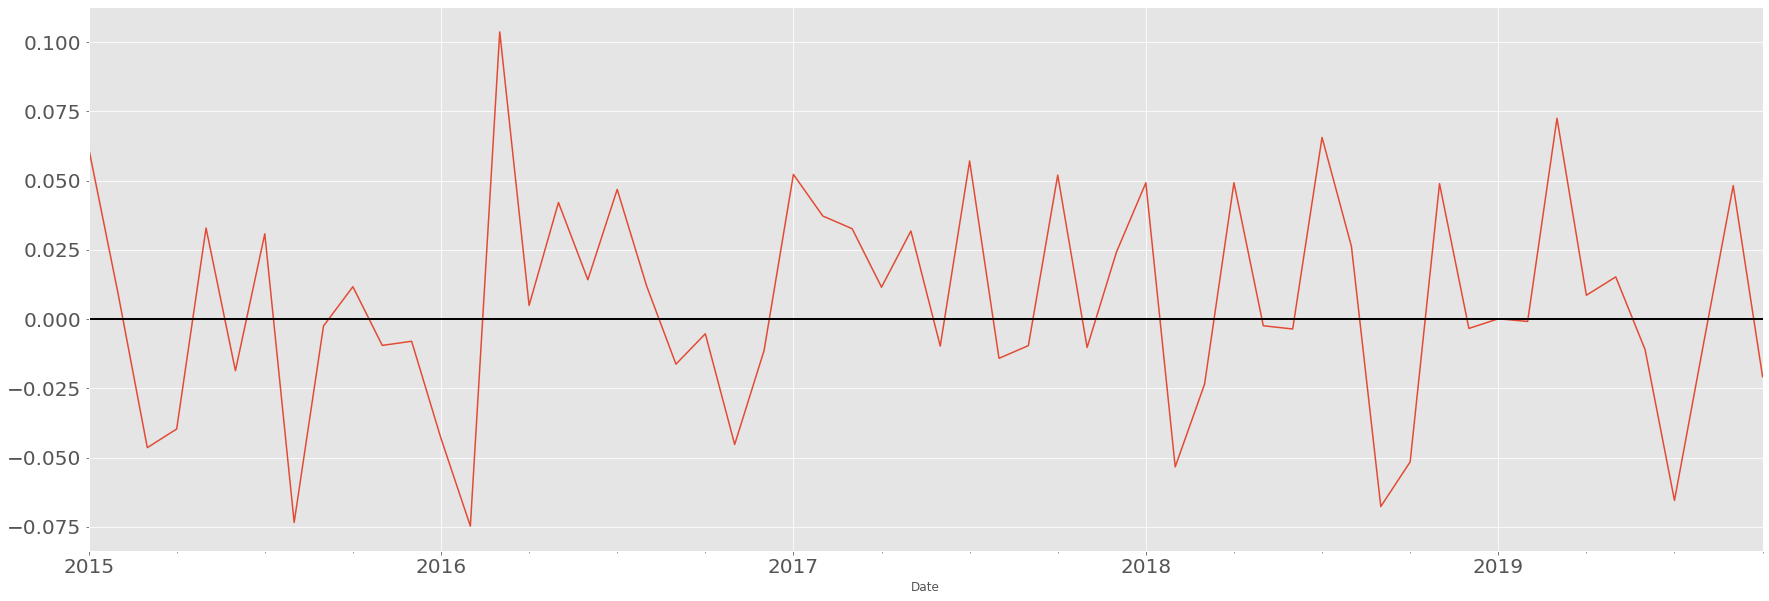

In [129]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

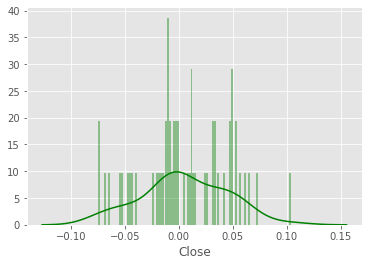

In [130]:
# Stock distribution_month_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

### Volumn Index

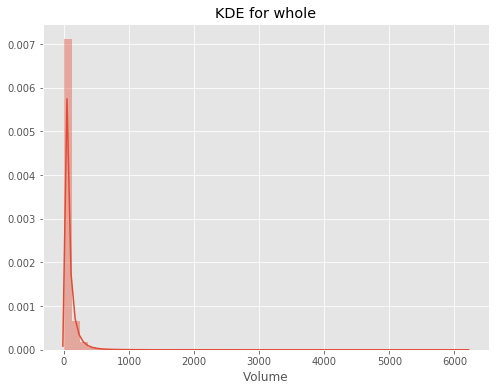

In [132]:
# KDE for Volumn
plt.figure(figsize=(8,6))
sns.distplot(N50.loc[:, 'Volume'])
plt.title('KDE for whole')
plt.show()

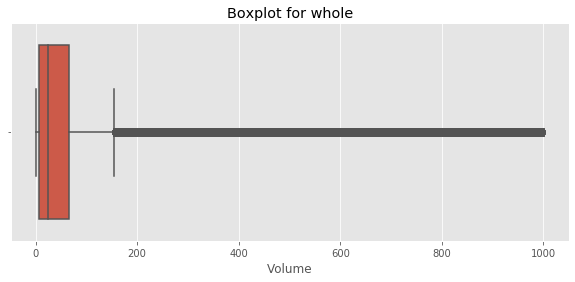

In [4]:
# Box plot for whole
plt.figure(figsize=(10,4))
sns.boxplot(N50.loc[N50['Volume'] <= 1000, 'Volume'])
plt.title('Boxplot for whole')
plt.show()

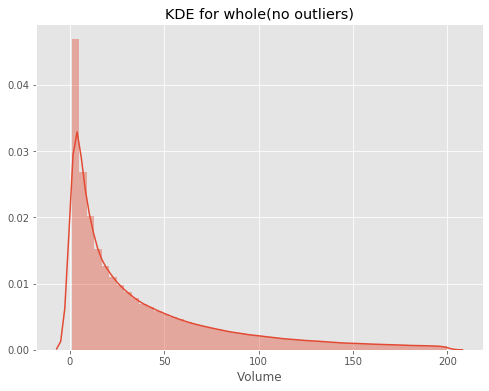

In [5]:
# KDE for Volumn(eliminat outliers)
plt.figure(figsize=(8,6))
sns.distplot(N50.loc[N50['Volume'] <= 200, 'Volume'])
plt.title('KDE for whole(no outliers)')
plt.show()

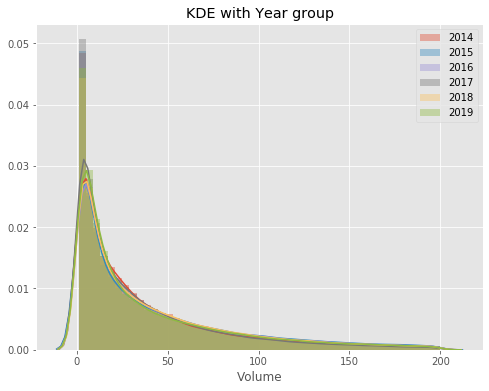

In [7]:
# Draw 6 KDE curves group by year
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.distplot(N50.loc[(N50['Year'] == Year_sorted[i]) & (N50['Volume'] <= 200), 'Volume'], label = str(Year_sorted[i]))
plt.title('KDE with Year group')
plt.legend()
plt.show()

In [29]:
# PVI NVI
import indicators
from indicators import positive_volume_index as pvi
from indicators import negative_volume_index as nvi

pvi(N50, 255, 'Close', 'Volume')
nvi(N50, 255, 'Close', 'Volume')

In [33]:
N50.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,pvi,pvi_ema,nvi,nvi_ema
0,2014-01-01,00:06,6364.0,6364.5,6364.0,6364.5,6,2014,1,1000.0,1000.000000,1000.0,1000.000000
1,2014-01-01,00:27,6364.5,6364.5,6364.5,6364.5,2,2014,1,1000.0,1000.000000,6364.5,3687.499022
2,2014-01-01,00:46,6364.5,6364.5,6364.5,6364.5,19,2014,1,6364.5,2795.169918,6364.5,4583.327454
3,2014-01-01,00:56,6364.5,6364.5,6364.5,6364.5,1,2014,1,6364.5,3692.748003,6364.5,5031.238240
4,2014-01-01,01:17,6366.0,6370.0,6366.0,6370.0,53,2014,1,6370.0,4232.397981,6364.5,5299.981967
